plot to visualize challenges 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
# from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import umap

from sklearn.cluster import DBSCAN, Birch, BisectingKMeans, KMeans, OPTICS, MiniBatchKMeans
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import  pairwise_distances
import matplotlib.patches as mpatches
from scipy.stats import kruskal
from openTSNE import TSNE

In [221]:
train_data_chrome = pd.read_parquet(
    "../data/processed/chrome/08_12_2022/train_set_featurized_response_BE.parquet.gzip",
    engine="pyarrow", dtype_backend="pyarrow",
)

In [222]:
data_firefox = pd.read_parquet(
    "../data/processed/firefox/08_12_2022/merged_data_featurized_response_BE.parquet.gzip",
    engine="pyarrow", dtype_backend="pyarrow",
)

In [223]:
data_brave = pd.read_parquet(
    "../data/processed/brave/08_12_2022/merged_data_featurized_response_BE.parquet.gzip",
    engine="pyarrow", dtype_backend="pyarrow",
)

In [220]:
data_chrome = pd.read_parquet(
    "../data/processed/chrome/03_29_2023/merged_data_featurized_response_BE.parquet.gzip",
    engine="pyarrow", dtype_backend="pyarrow",
)

In [160]:
train_data_chrome_full = pd.read_parquet(
    "../data/processed/chrome/08_12_2022/train_set_processed_response.parquet.gzip",
    engine="pyarrow", dtype_backend="pyarrow",
)

In [161]:
sparse_columns = {}
for column in train_data_chrome_full.columns:
    if pd.api.types.is_integer_dtype(train_data_chrome_full[column]):
        sparse_columns[column] = train_data_chrome_full[column].astype(pd.SparseDtype("int", np.nan))
    elif pd.api.types.is_float_dtype(train_data_chrome_full[column]):
        sparse_columns[column] = train_data_chrome_full[column].astype(pd.SparseDtype("float", np.nan))
    elif pd.api.types.is_string_dtype(train_data_chrome_full[column]):
        sparse_columns[column] = train_data_chrome_full[column].astype(pd.SparseDtype("string", np.nan))
    else:
        sparse_columns[column] = train_data_chrome_full[column]  # Leave other types as is

sparse_df = pd.DataFrame(sparse_columns)

In [162]:
# Handle missing values and label encode categorical columns
for column in train_data_chrome_full.columns:
    if train_data_chrome_full[column].dtype.name.startswith('dictionary'):
        # Convert dictionary type columns to string for label encoding
        train_data_chrome_full[column] = train_data_chrome_full[column].astype(str)
    if train_data_chrome_full[column].dtype == 'object':
        # Fill missing values with a placeholder before label encoding
        train_data_chrome_full[column].fillna('missing', inplace=True)
        # Label encode
        le = LabelEncoder()
        train_data_chrome_full[column] = le.fit_transform(train_data_chrome_full[column].astype(str))
    elif pd.api.types.is_numeric_dtype(train_data_chrome_full[column]):
        # Fill missing numeric values with the mean
        train_data_chrome_full[column].fillna(train_data_chrome_full[column].mean(), inplace=True)

In [163]:
# Standardize numeric columns
numeric_columns = train_data_chrome_full.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
train_data_chrome_full[numeric_columns] = scaler.fit_transform(train_data_chrome_full[numeric_columns])

In [164]:
# Ensure proper integer indexing
train_data_chrome_full.reset_index(drop=True, inplace=True)

In [179]:
sampled_df_chrome_full, _ = train_test_split(train_data_chrome_full, test_size=0.8, stratify=train_data_chrome_full['tracker'], random_state=10)

In [180]:
sampled_df_chrome_full.reset_index(drop=True, inplace=True)

In [181]:
%%time
tsne_chrome_full = TSNE(n_components=2, random_state=42, n_jobs=-1, perplexity=100)
tsne_results_chrome_full = tsne_chrome_full.fit_transform(sampled_df_chrome_full.iloc[:, :-4])

CPU times: user 53min 13s, sys: 16min 28s, total: 1h 9min 41s
Wall time: 8min 19s


In [182]:
tsne_df_chrome_full = pd.DataFrame(tsne_results_chrome_full, columns=['TSNE1', 'TSNE2'])
tsne_df_chrome_full['tracker'] = sampled_df_chrome_full['tracker']

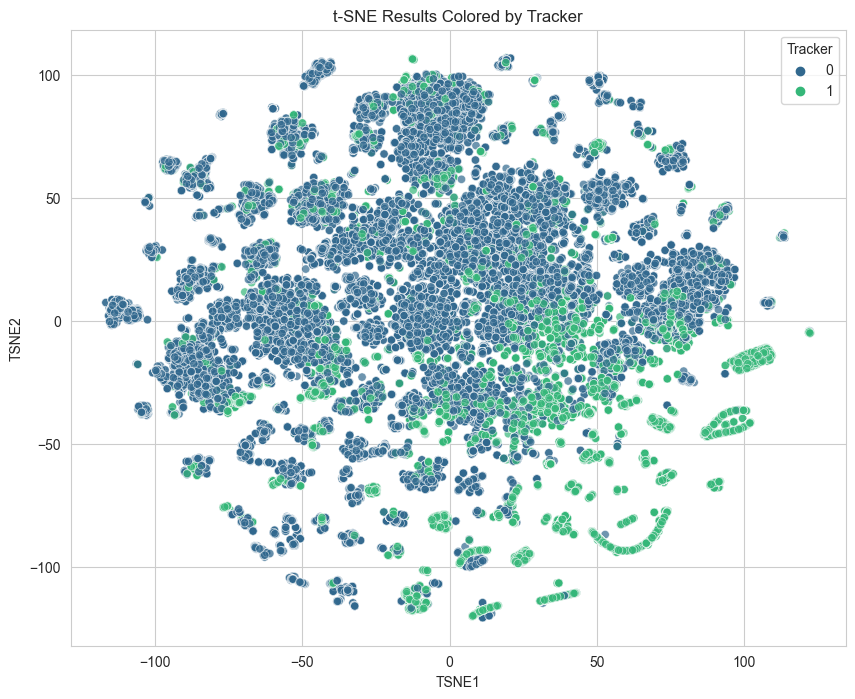

In [178]:
# Plot the t-SNE results colorized by 'tracker' column
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='tracker', data=tsne_df_chrome_full, palette="viridis", alpha=0.7)
plt.title('t-SNE Results Colored by Tracker')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Tracker')
plt.show()

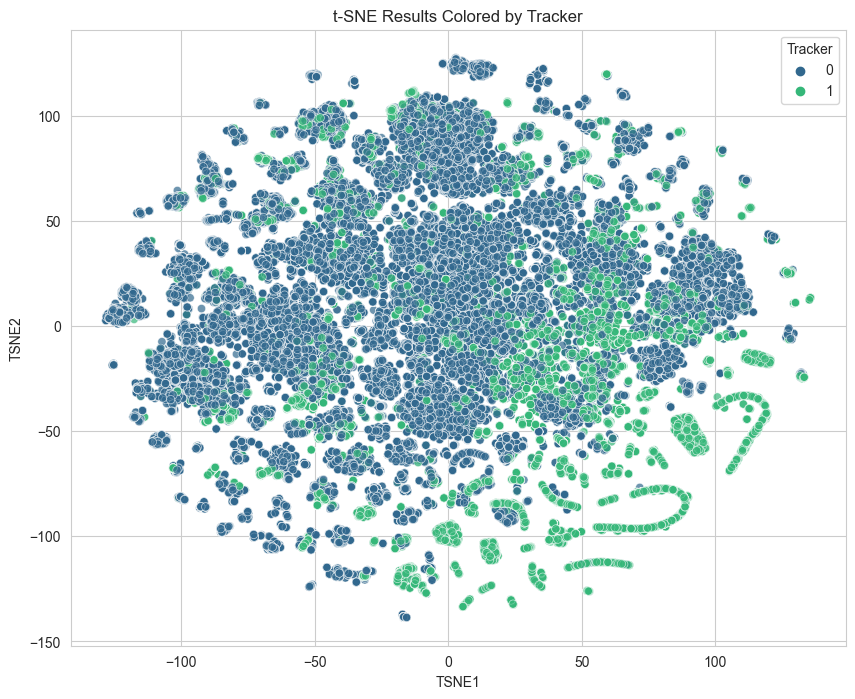

In [183]:
# Plot the t-SNE results colorized by 'tracker' column
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='tracker', data=tsne_df_chrome_full, palette="viridis", alpha=0.7)
plt.title('t-SNE Results Colored by Tracker')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Tracker')
plt.show()

In [34]:
# x, y = train_data_chrome.iloc[:, :-1], train_data_chrome.iloc[:, -1]

In [37]:
from sklearn.manifold import TSNE

In [38]:
# %%time
# tsne = TSNE(n_components=2, random_state=42)
# tsne_results = tsne.fit_transform(train_data_chrome)

CPU times: user 5h 12min 36s, sys: 21min 51s, total: 5h 34min 27s
Wall time: 50min 52s


In [39]:
# Create a DataFrame with t-SNE results
# tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

In [41]:
# tsne_df['tracker'] = train_data_chrome['tracker']

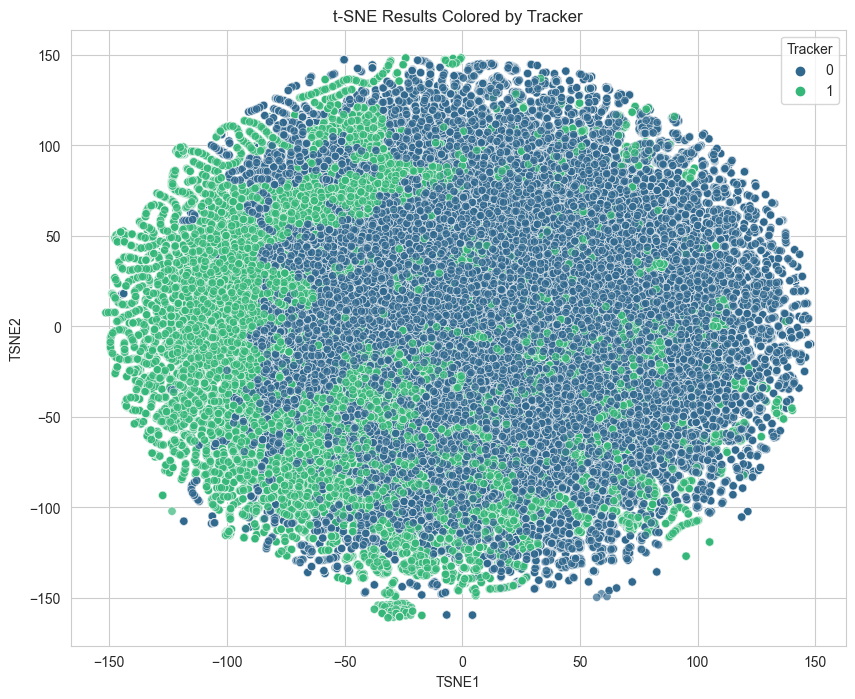

In [42]:
# # Plot the t-SNE results colorized by 'tracker' column
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='TSNE1', y='TSNE2', hue='tracker', data=tsne_df, palette="viridis", alpha=0.7)
# plt.title('t-SNE Results Colored by Tracker')
# plt.xlabel('TSNE1')
# plt.ylabel('TSNE2')
# plt.legend(title='Tracker')
# plt.show()

In [120]:
# sampled_df_chrome, _ = train_test_split(train_data_chrome, test_size=0.8, stratify=train_data_chrome['tracker'], random_state=10)

In [122]:
# %%time
# tsne_chrome = TSNE(n_components=2, random_state=42, n_jobs=-1, perplexity=100)
# tsne_results_chrome = tsne_chrome.fit_transform(sampled_df_chrome.iloc[:, 2:-3])
# tsne_df_chrome = pd.DataFrame(tsne_results_chrome, columns=['TSNE1', 'TSNE2'])
# tsne_df_chrome['tracker'] = sampled_df_chrome['tracker']

CPU times: user 50min 2s, sys: 16min 41s, total: 1h 6min 44s
Wall time: 7min 51s


In [155]:
# tsne_df_chrome = pd.DataFrame(tsne_results_chrome, columns=['TSNE1', 'TSNE2'])
# tsne_df_chrome['tracker'] = sampled_df_chrome['tracker']

In [153]:
# sampled_df_chrome.reset_index(drop=True, inplace=True)

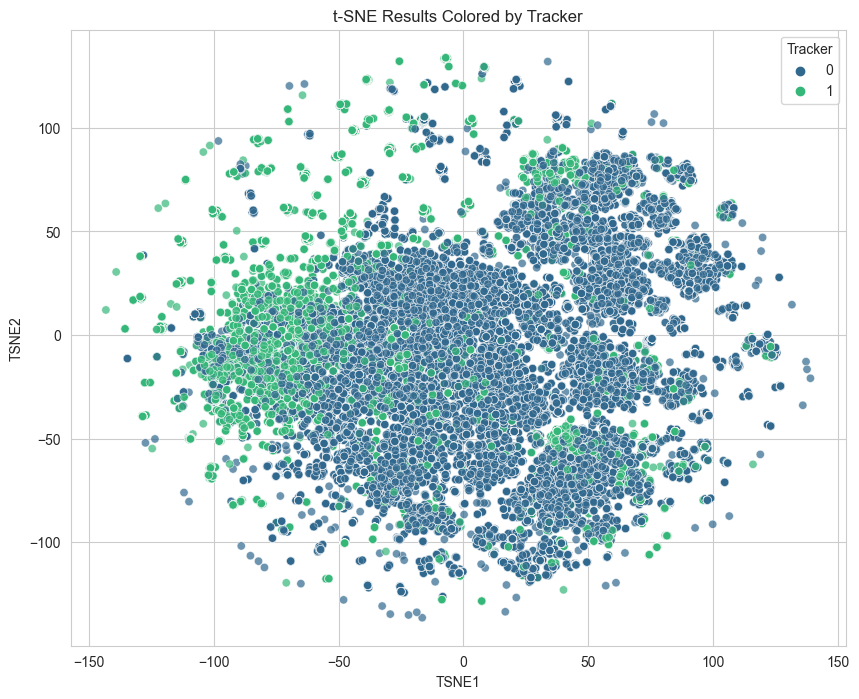

In [157]:
# # Plot the t-SNE results colorized by 'tracker' column
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='TSNE1', y='TSNE2', hue='tracker', data=tsne_df_chrome, palette="viridis", alpha=0.7)
# plt.title('t-SNE Results Colored by Tracker')
# plt.xlabel('TSNE1')
# plt.ylabel('TSNE2')
# plt.legend(title='Tracker')
# plt.show()

In [51]:
# def preprocess_dataset(df, label, categorical_columns, numeric_columns):
#     df['dataset'] = label  # Add a column to indicate the dataset
#     for column in categorical_columns:
#         if df[column].dtype.name.startswith('dictionary'):
#             df[column] = df[column].astype(str)
#         df[column].fillna('missing', inplace=True)
#         le = LabelEncoder()
#         df[column] = le.fit_transform(df[column].astype(str))
#     for column in numeric_columns:
#         df[column].fillna(df[column].mean(), inplace=True)
#     return df

In [58]:
# train_data_chrome.dtypes

comb_col_non_tracker                             uint8[pyarrow]
comb_col_tracker                                 uint8[pyarrow]
amp-access-control-allow-source-origin_binary    uint8[pyarrow]
x-hubspot-correlation-id_binary                  uint8[pyarrow]
x-tt-trace-tag_binary                            uint8[pyarrow]
                                                      ...      
date_binary                                      uint8[pyarrow]
content-security-policy_binary                   uint8[pyarrow]
x-request-id_binary                              uint8[pyarrow]
httpMessageId                                    uint8[pyarrow]
tracker                                          uint8[pyarrow]
Length: 165, dtype: object

In [62]:
# num_columns = train_data_chrome.select_dtypes(include=['uint8']).columns.tolist()

In [224]:
train_data_chrome['dataset'] = 'chrome'
data_firefox['dataset'] = 'firefox'
data_brave['dataset'] = 'brave'
data_chrome['dataset'] = 'chrome_new'

In [225]:
combined_df = pd.concat([train_data_chrome, data_firefox, data_brave, data_chrome], ignore_index=True)

In [226]:
combined_df.reset_index(drop=True, inplace=True)

In [227]:
sampled_df, _ = train_test_split(combined_df, test_size=0.9, stratify=combined_df['tracker'], random_state=10)

In [228]:
sampled_df

comb_col_non_tracker  comb_col_tracker   
1833774                     0                 0  \
1151233                     0                 0   
47512                       3                 0   
861095                      0                 0   
2136796                     0                 0   
...                       ...               ...   
1033301                     0                 0   
1709626                     0                 0   
2319030                     0                 1   
2090249                     0                 0   
842425                      0                 0   

         amp-access-control-allow-source-origin_binary   
1833774                                              0  \
1151233                                              0   
47512                                                0   
861095                                               0   
2136796                                              0   
...                                                ...   
1033301                                              0   
1709626                                              0   
2319030                                              0   
2090249                                              0   
842425                                               0   

         x-hubspot-correlation-id_binary  x-tt-trace-tag_binary   
1833774                                0                      0  \
1151233                                0                      0   
47512                                  0                      0   
861095                                 0                      0   
2136796                                0                      0   
...                                  ...                    ...   
1033301                                0                      0   
1709626                                0                      1   
2319030                                0                      0   
2090249                                0                      0   
842425                                 0                      0   

         cdn-pullzone_binary  x-akamai-request-id_binary  requestid_binary   
1833774                    0                           0                 0  \
1151233                    0                           0                 0   
47512                      0                           0                 0   
861095                     0                           0                 0   
2136796                    0                           0                 0   
...                      ...                         ...               ...   
1033301                    0                           0                 0   
1709626                    0                           1                 0   
2319030                    0                           0                 0   
2090249                    0                           0                 0   
842425                     0                           0                 0   

         x-vcl-time-ms_binary  cross-origin-opener-policy_binary  ...   
1833774                     0                                  0  ...  \
1151233                     0                                  0  ...   
47512                       0                                  0  ...   
861095                      0                                  0  ...   
2136796                     0                                  0  ...   
...                       ...                                ...  ...   
1033301                     0                                  0  ...   
1709626                     0                                  0  ...   
2319030                     0                                  0  ...   
2090249                     0                                  0  ...   
842425                      0                                  0  ...   

         x-served-by_binary  x-accel-expires_binary  request-context_binary   
1

In [229]:
X = sampled_df.iloc[:, 2:-3]

In [230]:
y = sampled_df['tracker']

In [248]:
%%time
tsne_combined = TSNE(n_components=2, random_state=10, perplexity=100, n_jobs=-1)
tsne_results_combined = tsne_combined.fit_transform(X)

CPU times: user 1h 57min 59s, sys: 20min 47s, total: 2h 18min 47s
Wall time: 20min 31s


In [249]:
tsne_df_combined = pd.DataFrame(tsne_results_combined, columns=['TSNE1', 'TSNE2'])
tsne_df_combined['tracker'] = sampled_df['tracker'].values
tsne_df_combined['dataset'] = sampled_df['dataset'].values

In [250]:
tsne_df_combined['dataset_tracker'] = tsne_df_combined['dataset'] + "_" + tsne_df_combined['tracker'].astype(str)

In [251]:
# Split the DataFrame into trackers and non-trackers
tsne_non_trackers = tsne_df_combined[tsne_df_combined['tracker'] == 0]
tsne_trackers = tsne_df_combined[tsne_df_combined['tracker'] == 1]

In [235]:
# Define custom color palettes for trackers and non-trackers
palette_non_trackers = {
    'chrome_0': '#E69F00',
    'chrome_new_0': '#56B4E9',
    'firefox_0': '#009E73',
    'brave_0': '#0072B2'
}

palette_trackers = {
    'chrome_1': '#E69F00',
    'chrome_new_1': '#56B4E9',
    'firefox_1': '#009E73',
    'brave_1': '#0072B2'
}

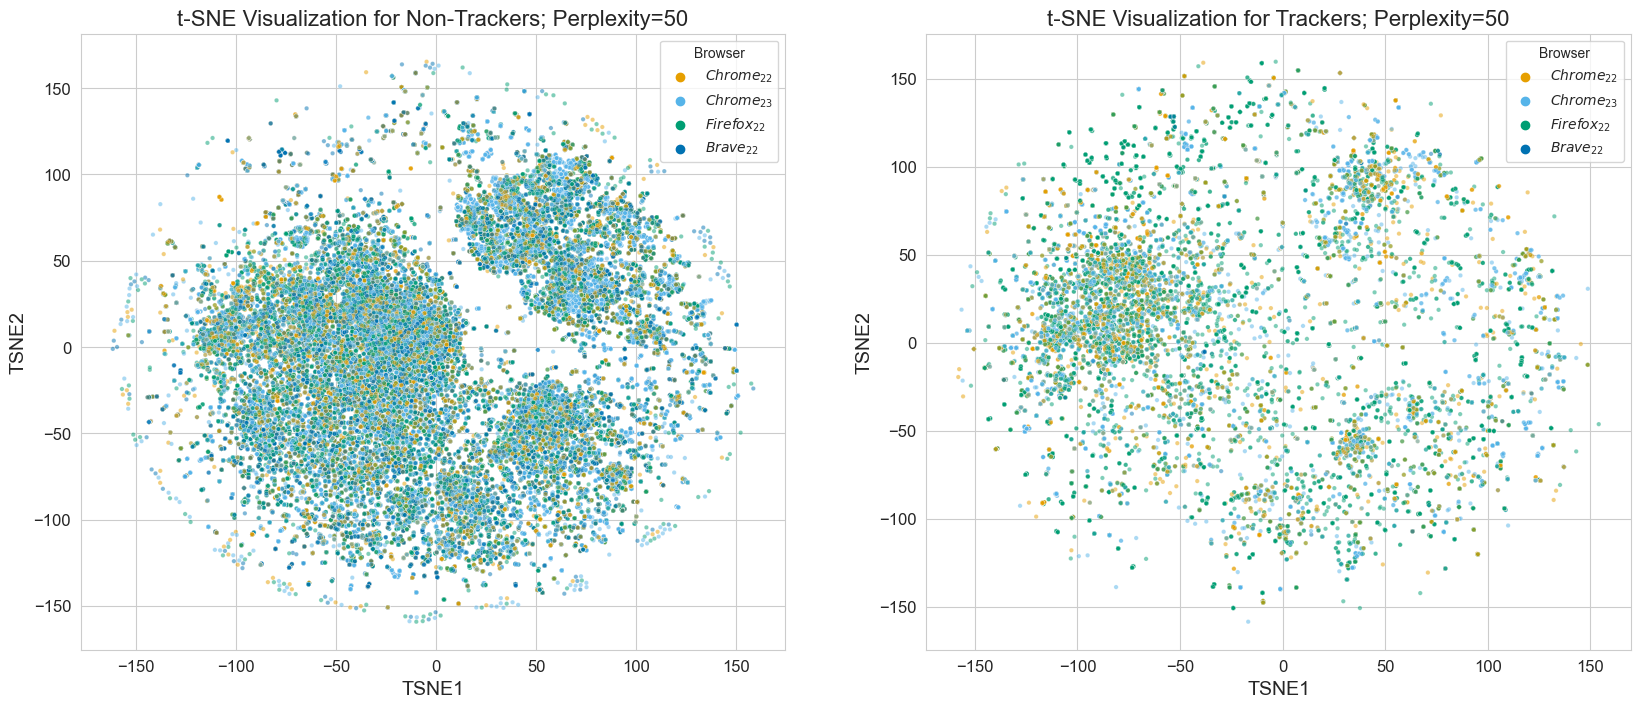

In [246]:
# Plot the t-SNE results
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

hue_order_non_trackers = ['chrome_0', 'chrome_new_0', 'firefox_0', 'brave_0']
hue_order_trackers = ['chrome_1', 'chrome_new_1', 'firefox_1', 'brave_1']

# Non-trackers plot
sns.scatterplot(x='TSNE1', y='TSNE2', hue='dataset_tracker', data=tsne_non_trackers, palette=palette_non_trackers, hue_order=hue_order_non_trackers, alpha=0.5, ax=ax[0], s=10, c='k')
ax[0].set_title('t-SNE Visualization for Non-Trackers; Perplexity=50', fontsize=16)
ax[0].set_xlabel('TSNE1', fontsize=14)
ax[0].set_ylabel('TSNE2', fontsize=14)
ax[0].legend(title='Browser')
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)
ax[0].grid(True)

# Trackers plot
sns.scatterplot(x='TSNE1', y='TSNE2', hue='dataset_tracker', data=tsne_trackers, palette=palette_trackers, hue_order=hue_order_trackers, alpha=0.5, ax=ax[1], s=10, c='k')
ax[1].set_title('t-SNE Visualization for Trackers; Perplexity=50', fontsize=16)
ax[1].set_xlabel('TSNE1', fontsize=14)
ax[1].set_ylabel('TSNE2', fontsize=14)
ax[1].legend(title='Browser')
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].yaxis.set_tick_params(labelsize=12)
ax[1].grid(True)

# Modify the legend labels to show only the browser name
handles, labels = ax[0].get_legend_handles_labels()
new_labels = ['$Chrome_{22}$', '$Chrome_{23}$', '$Firefox_{22}$', '$Brave_{22}$']
ax[0].legend(handles=handles, labels=new_labels, title='Browser', loc='upper right')

handles, labels = ax[1].get_legend_handles_labels()
new_labels = ['$Chrome_{22}$', '$Chrome_{23}$', '$Firefox_{22}$', '$Brave_{22}$']
ax[1].legend(handles=handles, labels=new_labels, title='Browser', loc='upper right')
plt.savefig('tsne_clustering.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

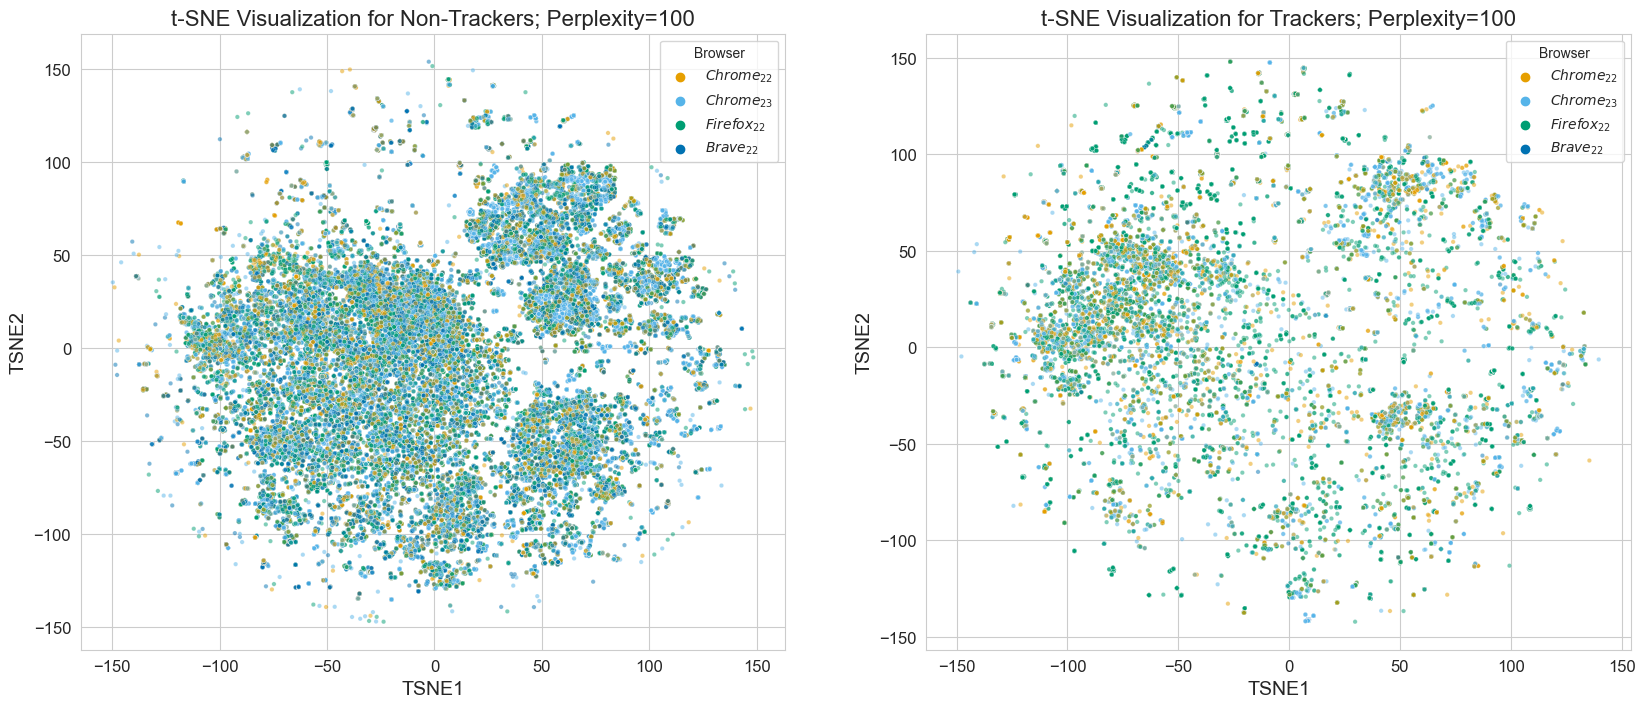

In [253]:
# Plot the t-SNE results
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

hue_order_non_trackers = ['chrome_0', 'chrome_new_0', 'firefox_0', 'brave_0']
hue_order_trackers = ['chrome_1', 'chrome_new_1', 'firefox_1', 'brave_1']

# Non-trackers plot
sns.scatterplot(x='TSNE1', y='TSNE2', hue='dataset_tracker', data=tsne_non_trackers, palette=palette_non_trackers, hue_order=hue_order_non_trackers, alpha=0.5, ax=ax[0], s=10, c='k')
ax[0].set_title('t-SNE Visualization for Non-Trackers; Perplexity=100', fontsize=16)
ax[0].set_xlabel('TSNE1', fontsize=14)
ax[0].set_ylabel('TSNE2', fontsize=14)
ax[0].legend(title='Browser')
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)
ax[0].grid(True)

# Trackers plot
sns.scatterplot(x='TSNE1', y='TSNE2', hue='dataset_tracker', data=tsne_trackers, palette=palette_trackers, hue_order=hue_order_trackers, alpha=0.5, ax=ax[1], s=10, c='k')
ax[1].set_title('t-SNE Visualization for Trackers; Perplexity=100', fontsize=16)
ax[1].set_xlabel('TSNE1', fontsize=14)
ax[1].set_ylabel('TSNE2', fontsize=14)
ax[1].legend(title='Browser')
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].yaxis.set_tick_params(labelsize=12)
ax[1].grid(True)

# Modify the legend labels to show only the browser name
handles, labels = ax[0].get_legend_handles_labels()
new_labels = ['$Chrome_{22}$', '$Chrome_{23}$', '$Firefox_{22}$', '$Brave_{22}$']
ax[0].legend(handles=handles, labels=new_labels, title='Browser', loc='upper right')

handles, labels = ax[1].get_legend_handles_labels()
new_labels = ['$Chrome_{22}$', '$Chrome_{23}$', '$Firefox_{22}$', '$Brave_{22}$']
ax[1].legend(handles=handles, labels=new_labels, title='Browser', loc='upper right')
# plt.savefig('tsne_clustering.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Amout of custom headers

In [187]:
old_chrome = pd.read_parquet(
    "../data/processed/chrome/08_12_2022/merged_data_response.parquet.gzip",
    engine="pyarrow", dtype_backend="pyarrow",
)

In [188]:
count_custom_headers = len([col for col in old_chrome.columns if col.lower().startswith('x-')])

In [189]:
print(f'Number of custom headers in chrome: {count_custom_headers}')

Number of custom headers in chrome: 5612


In [202]:
standard_headers = ['age', 'accept-patch', 'accept-ranges','allow','alt-svc','cache-control','connection','content-disposition',
                    'content-encoding','content-language','content-length','content-location','content-range','content-type',
                    'date','delta-base','etag','expires','im','last-modified','link','location','pragma','proxy-authenticate',
                    'public-key-pins','retry-after','server','set-cookie','strict-transport-security','strict-transport-security',
                    'trailer','transfer-encoding','tk','upgrade','vary','via','warning','www-authenticate','access-control-allow-origin',
                    'access-control-allow-credentials','access-control-expose-headers','access-control-max-age','access-control-allow-methods',
                    'access-control-allow-headers']

In [204]:
count_custom_headers = len(
    [col for col in old_chrome.columns if col.lower() not in standard_headers])
print(f'Number of custom headers in chrome: {count_custom_headers}')

Number of custom headers in chrome: 8058
